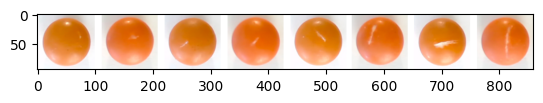

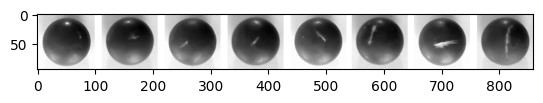

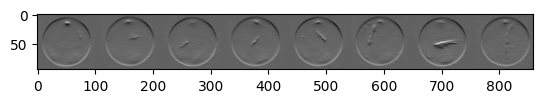

Number of stars counted :  296


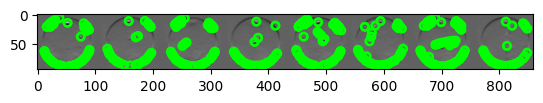

In [14]:
import glob
from math import sqrt

from matplotlib import pyplot as plt
from matplotlib import cm
from skimage import data
from skimage import filters
from skimage.filters import sobel_h
from skimage.color import rgb2gray
from skimage.feature import blob_dog, blob_doh, blob_log
from skimage.io import imread

example_file = glob.glob(r"/home/joaogabriel/ImageProcessing/images/laranjas.png")[0]
im = imread(example_file)
plt.imshow(im)
plt.show()

im = imread(example_file, as_gray=True)
plt.imshow(im, cmap=cm.gray)
plt.show()

image_sobelh = sobel_h(im)
plt.imshow(image_sobelh, cmap=cm.gray)
plt.show()

blobs_log = blob_log(image_sobelh, max_sigma=30, num_sigma=10, threshold=.03)
# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
numrows = len(blobs_log)
print("Number of stars counted : " ,numrows)


fig, ax = plt.subplots(1, 1)
plt.imshow(image_sobelh, cmap=cm.gray)
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+5, color='lime', linewidth=2, fill=False)
    ax.add_patch(c)